<a href="https://colab.research.google.com/github/briampuentes920-cmd/Challenge-alura-store-python/blob/main/AluraStoreLatam_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [48]:
import pandas as pd

tienda1 = pd.read_csv('/content/tienda_1.csv')  # 👈 con el espacio antes del punto
tienda2 = pd.read_csv('/content/tienda_2.csv')
tienda3 = pd.read_csv('/content/tienda_3.csv')
tienda4 = pd.read_csv('/content/tienda_4.csv')

for i, df in enumerate([tienda1, tienda2, tienda3, tienda4], start=1):
    print(f"Tienda {i}: {df.shape}")

tienda1.head()


Tienda 1: (2359, 12)
Tienda 2: (2359, 12)
Tienda 3: (2359, 12)
Tienda 4: (2358, 12)


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300","6,900",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,5,-74
1,Mesa de comedor,Muebles,"192,300","8,400",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6,-76
2,Juego de mesa,Juguetes,"209,600","15,900",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10,-76
3,Microondas,Electrodomésticos,"757,500","41,000",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3,-77
4,Silla de oficina,Muebles,"335,200","20,200",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6,-76


#1. Análisis de facturación



In [49]:

tienda1.info()

tienda1.isnull().sum()

tienda1.describe()

print("Columnas disponibles:", tienda1.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
Columnas disponibles: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío'

In [50]:

ingresos = {
    'Tienda 1': tienda1['Precio'].sum(),
    'Tienda 2': tienda2['Precio'].sum(),
    'Tienda 3': tienda3['Precio'].sum(),
    'Tienda 4': tienda4['Precio'].sum()
}
pd.options.display.float_format = '{:,.0f}'.format
resumen

ingresos_df = pd.DataFrame(list(ingresos.items()), columns=['Tienda', 'Ingreso Total'])
ingresos_df


,Tienda,Ingreso Total
0,Tienda 1,"1,150,880,400"
1,Tienda 2,"1,116,343,500"
2,Tienda 3,"1,098,019,600"
3,Tienda 4,"1,038,375,700"


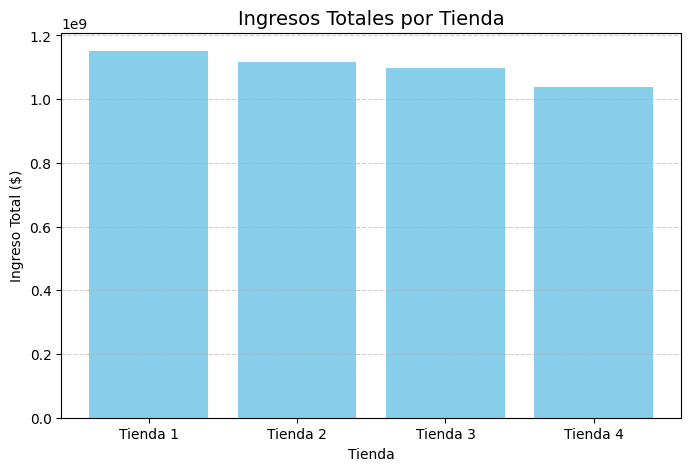

In [51]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(ingresos_df['Tienda'], ingresos_df['Ingreso Total'], color='skyblue')
plt.title('Ingresos Totales por Tienda', fontsize=14)
plt.xlabel('Tienda')
plt.ylabel('Ingreso Total ($)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [53]:

cat_t1 = tienda1.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
cat_t2 = tienda2.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
cat_t3 = tienda3.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
cat_t4 = tienda4.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)

print("🛍️ Tienda 1 - Productos vendidos por categoría:\n", cat_t1.head(), "\n")
print("🛍️ Tienda 2 - Productos vendidos por categoría:\n", cat_t2.head(), "\n")
print("🛍️ Tienda 3 - Productos vendidos por categoría:\n", cat_t3.head(), "\n")
print("🛍️ Tienda 4 - Productos vendidos por categoría:\n", cat_t4.head(), "\n")


🛍️ Tienda 1 - Productos vendidos por categoría:
 Categoría del Producto
Muebles                 465
Electrónicos            448
Juguetes                324
Electrodomésticos       312
Deportes y diversión    284
Name: Producto, dtype: int64 

🛍️ Tienda 2 - Productos vendidos por categoría:
 Categoría del Producto
Muebles                 442
Electrónicos            422
Juguetes                313
Electrodomésticos       305
Deportes y diversión    275
Name: Producto, dtype: int64 

🛍️ Tienda 3 - Productos vendidos por categoría:
 Categoría del Producto
Muebles                 499
Electrónicos            451
Juguetes                315
Electrodomésticos       278
Deportes y diversión    277
Name: Producto, dtype: int64 

🛍️ Tienda 4 - Productos vendidos por categoría:
 Categoría del Producto
Muebles                 480
Electrónicos            451
Juguetes                338
Deportes y diversión    277
Electrodomésticos       254
Name: Producto, dtype: int64 



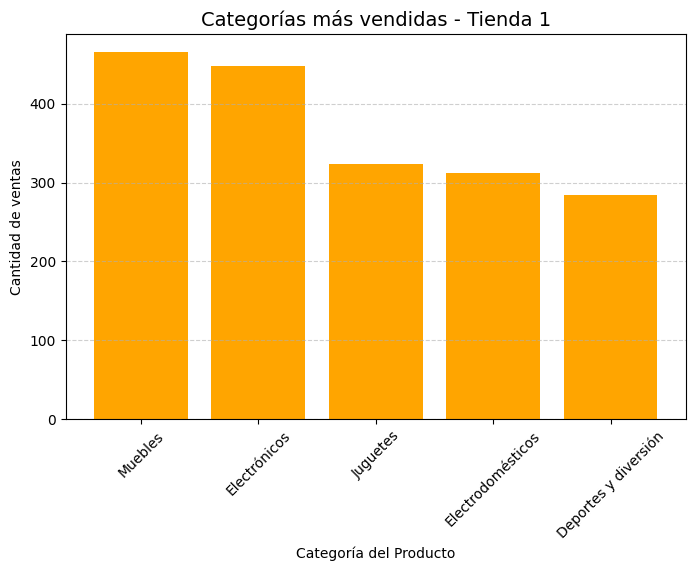

In [11]:
import matplotlib.pyplot as plt

top_categorias_t1 = cat_t1.head(5)

plt.figure(figsize=(8,5))
plt.bar(top_categorias_t1.index, top_categorias_t1.values, color='orange')
plt.title('Categorías más vendidas - Tienda 1', fontsize=14)
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# 2. Ventas por categoría

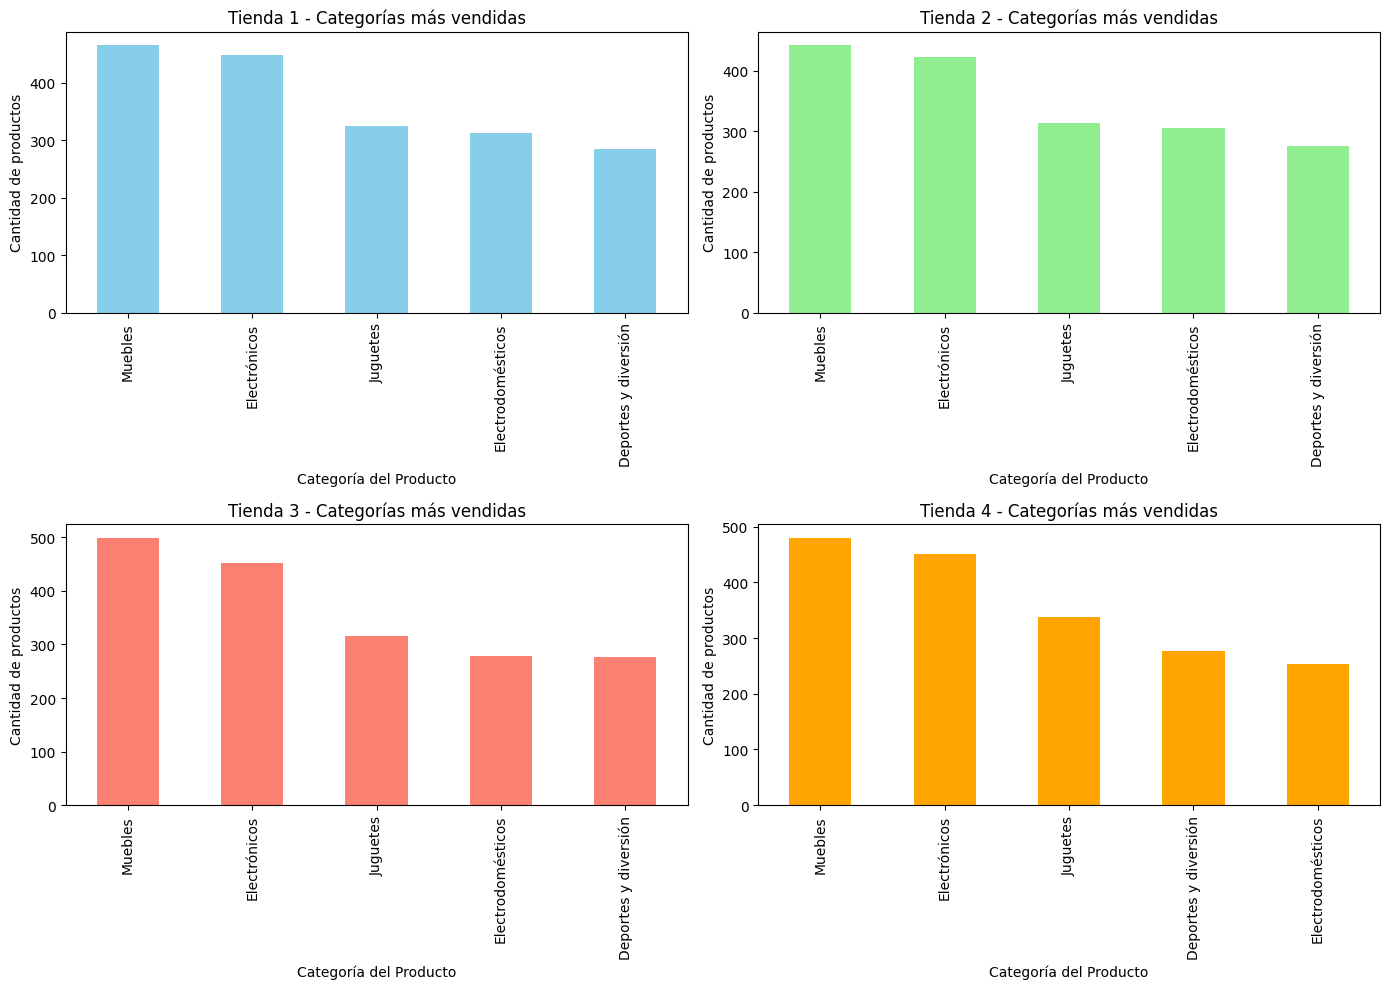

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))

# Tienda 1
plt.subplot(2,2,1)
cat_t1.head(5).plot(kind='bar', color='skyblue')
plt.title('Tienda 1 - Categorías más vendidas')
plt.ylabel('Cantidad de productos')

# Tienda 2
plt.subplot(2,2,2)
cat_t2.head(5).plot(kind='bar', color='lightgreen')
plt.title('Tienda 2 - Categorías más vendidas')
plt.ylabel('Cantidad de productos')

# Tienda 3
plt.subplot(2,2,3)
cat_t3.head(5).plot(kind='bar', color='salmon')
plt.title('Tienda 3 - Categorías más vendidas')
plt.ylabel('Cantidad de productos')

# Tienda 4
plt.subplot(2,2,4)
cat_t4.head(5).plot(kind='bar', color='orange')
plt.title('Tienda 4 - Categorías más vendidas')
plt.ylabel('Cantidad de productos')

plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


⭐ Calificación promedio por tienda ⭐
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


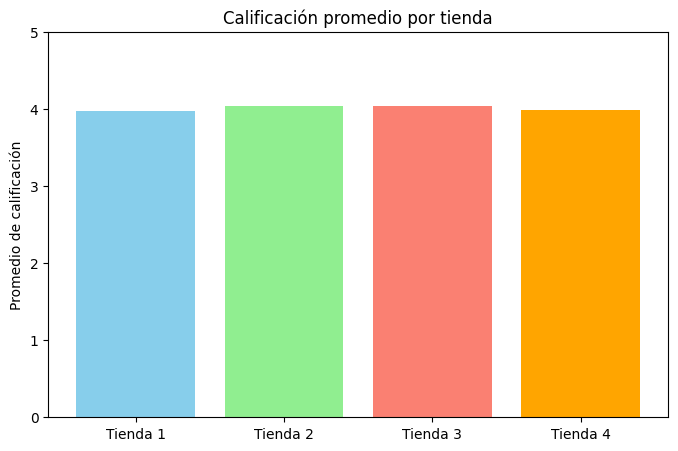

In [56]:

calif_t1 = tienda1['Calificación'].mean()
calif_t2 = tienda2['Calificación'].mean()
calif_t3 = tienda3['Calificación'].mean()
calif_t4 = tienda4['Calificación'].mean()

print("⭐ Calificación promedio por tienda ⭐")
print(f"Tienda 1: {calif_t1:.2f}")
print(f"Tienda 2: {calif_t2:.2f}")
print(f"Tienda 3: {calif_t3:.2f}")
print(f"Tienda 4: {calif_t4:.2f}")


plt.figure(figsize=(8,5))
plt.bar(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
        [calif_t1, calif_t2, calif_t3, calif_t4],
        color=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.title('Calificación promedio por tienda')
plt.ylabel('Promedio de calificación')
plt.ylim(0,5)
plt.show()


# 4. Productos más y menos vendidos

🛒 Productos más vendidos - Tienda 1:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

🚫 Productos menos vendidos - Tienda 1:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64


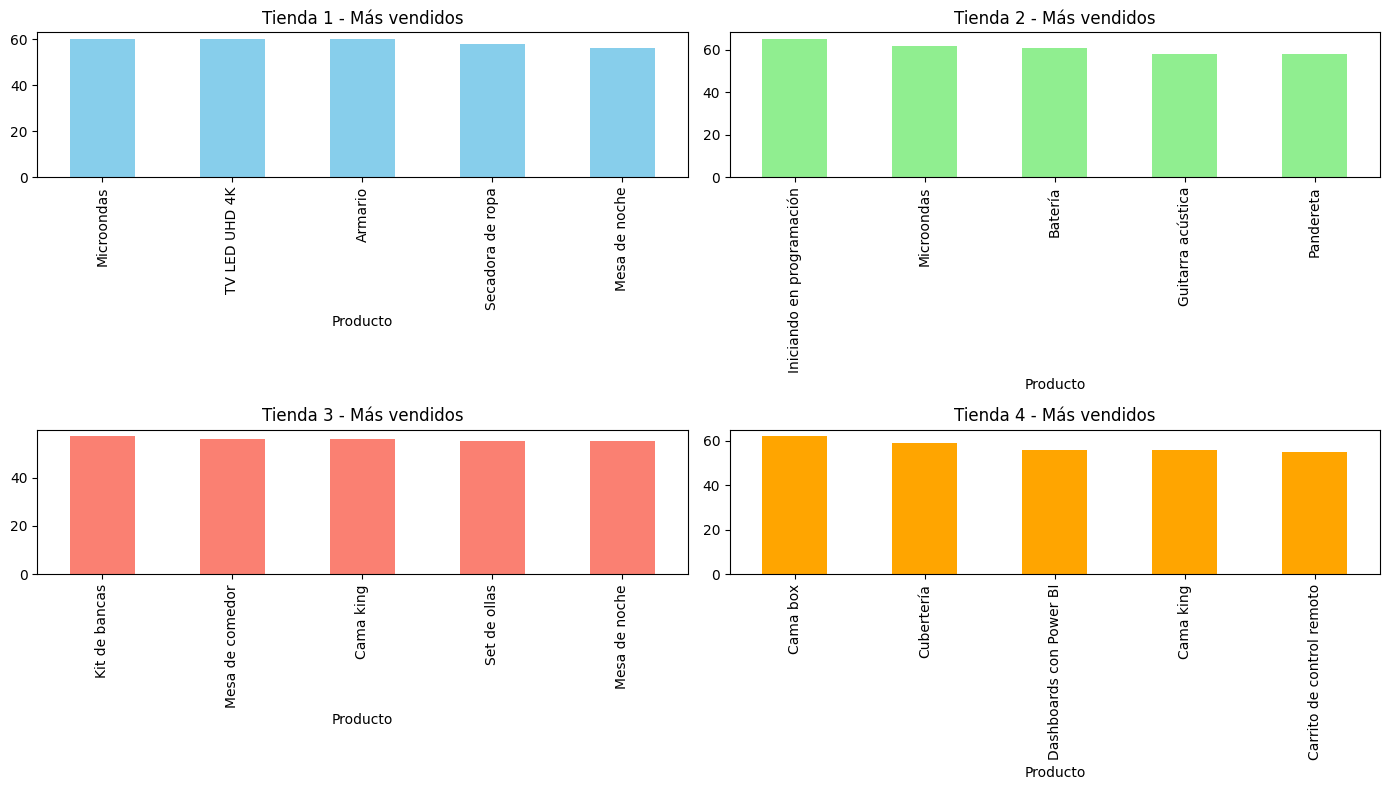

In [57]:

mas_vendidos_t1 = tienda1['Producto'].value_counts().head(5)
mas_vendidos_t2 = tienda2['Producto'].value_counts().head(5)
mas_vendidos_t3 = tienda3['Producto'].value_counts().head(5)
mas_vendidos_t4 = tienda4['Producto'].value_counts().head(5)


menos_vendidos_t1 = tienda1['Producto'].value_counts().tail(5)
menos_vendidos_t2 = tienda2['Producto'].value_counts().tail(5)
menos_vendidos_t3 = tienda3['Producto'].value_counts().tail(5)
menos_vendidos_t4 = tienda4['Producto'].value_counts().tail(5)


print("🛒 Productos más vendidos - Tienda 1:")
print(mas_vendidos_t1)
print("\n🚫 Productos menos vendidos - Tienda 1:")
print(menos_vendidos_t1)


plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
mas_vendidos_t1.plot(kind='bar', color='skyblue')
plt.title('Tienda 1 - Más vendidos')

plt.subplot(2,2,2)
mas_vendidos_t2.plot(kind='bar', color='lightgreen')
plt.title('Tienda 2 - Más vendidos')

plt.subplot(2,2,3)
mas_vendidos_t3.plot(kind='bar', color='salmon')
plt.title('Tienda 3 - Más vendidos')

plt.subplot(2,2,4)
mas_vendidos_t4.plot(kind='bar', color='orange')
plt.title('Tienda 4 - Más vendidos')

plt.tight_layout()
plt.show()



# 5. Envío promedio por tienda

💰 Envío promedio por tienda:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


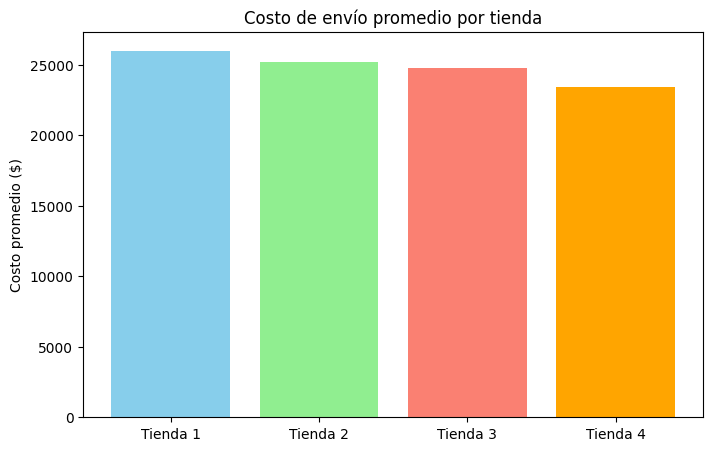

In [59]:

envio_t1 = tienda1['Costo de envío'].mean()
envio_t2 = tienda2['Costo de envío'].mean()
envio_t3 = tienda3['Costo de envío'].mean()
envio_t4 = tienda4['Costo de envío'].mean()


print("💰 Envío promedio por tienda:")
print(f"Tienda 1: ${envio_t1:.2f}")
print(f"Tienda 2: ${envio_t2:.2f}")
print(f"Tienda 3: ${envio_t3:.2f}")
print(f"Tienda 4: ${envio_t4:.2f}")


plt.figure(figsize=(8,5))
plt.bar(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
        [envio_t1, envio_t2, envio_t3, envio_t4],
        color=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.title('Costo de envío promedio por tienda')
plt.ylabel('Costo promedio ($)')
plt.show()


In [58]:

ingresos_df['Ingreso Total'] = ingresos_df['Ingreso Total'].astype(float)
total_chain = ingresos_df['Ingreso Total'].sum()
ingresos_df['% del Total'] = ingresos_df['Ingreso Total'] / total_chain * 100
ingresos_df['Ingreso Total (COP)'] = ingresos_df['Ingreso Total'].map(lambda x: f"${x:,.0f}")
ingresos_df[['Tienda','Ingreso Total (COP)','% del Total']]


,Tienda,Ingreso Total (COP),% del Total
0,Tienda 1,"$1,150,880,400",26
1,Tienda 2,"$1,116,343,500",25
2,Tienda 3,"$1,098,019,600",25
3,Tienda 4,"$1,038,375,700",24


In [60]:

n_reseñas = {
    'Tienda 1': tienda1['Calificación'].count(),
    'Tienda 2': tienda2['Calificación'].count(),
    'Tienda 3': tienda3['Calificación'].count(),
    'Tienda 4': tienda4['Calificación'].count()
}
n_reseñas_df = pd.DataFrame(list(n_reseñas.items()), columns=['Tienda','N_reseñas'])
n_reseñas_df


,Tienda,N_reseñas
0,Tienda 1,2359
1,Tienda 2,2359
2,Tienda 3,2359
3,Tienda 4,2358


In [21]:
import os
os.makedirs('images', exist_ok=True)


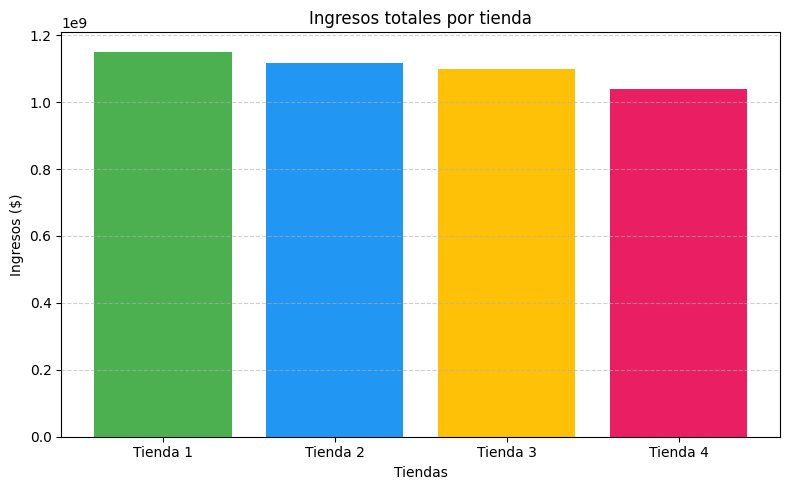

In [61]:
import os
import matplotlib.pyplot as plt


os.makedirs('images', exist_ok=True)


tiendas = list(ingresos.keys())
valores = list(ingresos.values())

plt.figure(figsize=(8,5))
plt.bar(tiendas, valores, color=['#4CAF50', '#2196F3', '#FFC107', '#E91E63'])
plt.title('Ingresos totales por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos ($)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('images/ingresos_por_tienda.png')
plt.show()



Tienda con menor ingreso: Tienda 4


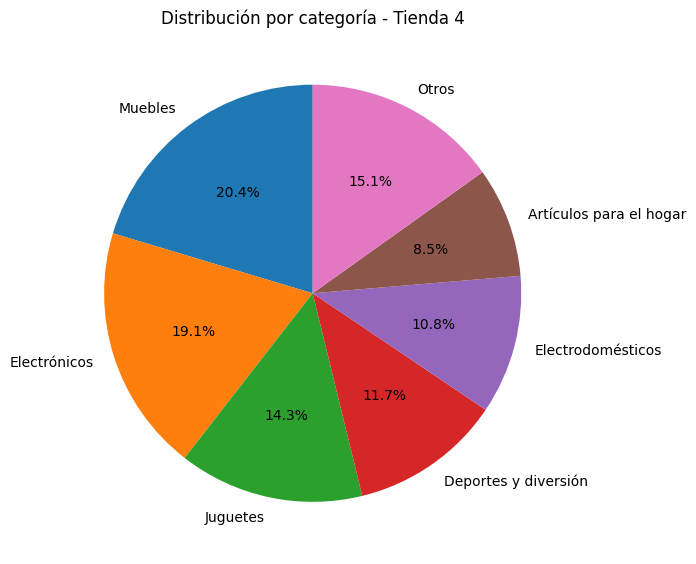

In [62]:

worst_store = ingresos_df.loc[ingresos_df['Ingreso Total'].idxmin(), 'Tienda']
print("Tienda con menor ingreso:", worst_store)


cats = {'Tienda 1': cat_t1, 'Tienda 2': cat_t2, 'Tienda 3': cat_t3, 'Tienda 4': cat_t4}
cat_worst = cats[worst_store]


top = cat_worst.head(6)
others_sum = cat_worst.sum() - top.sum()
labels = list(top.index) + ['Otros']
sizes = list(top.values) + [others_sum]

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title(f'Distribución por categoría - {worst_store}')
plt.tight_layout()
plt.savefig('images/categorias_pie_' + worst_store.replace(' ','_') + '.png')
plt.show()


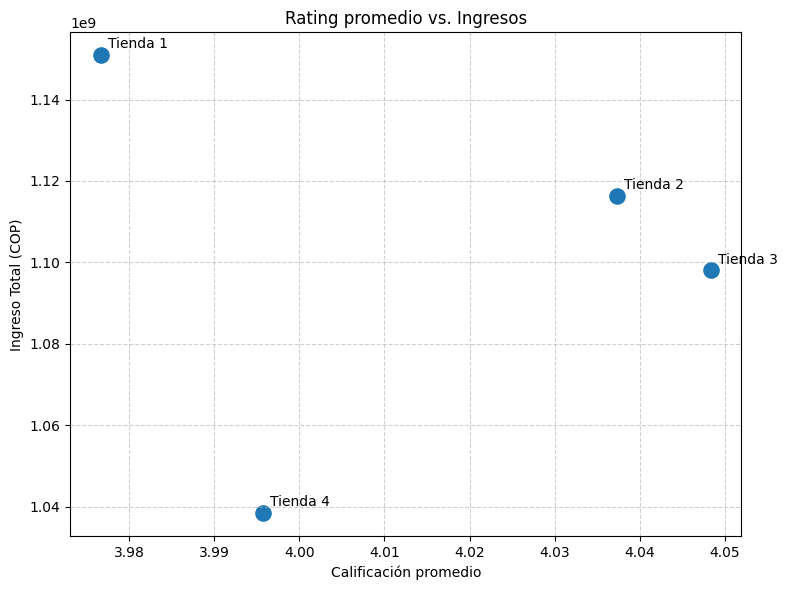

In [63]:

ratings = [calif_t1, calif_t2, calif_t3, calif_t4]
incomes = ingresos_df['Ingreso Total'].tolist()
stores_list = ingresos_df['Tienda'].tolist()

plt.figure(figsize=(8,6))
plt.scatter(ratings, incomes, s=120)
for i, txt in enumerate(stores_list):
    plt.annotate(txt, (ratings[i], incomes[i]), textcoords="offset points", xytext=(5,5))
plt.xlabel('Calificación promedio')
plt.ylabel('Ingreso Total (COP)')
plt.title('Rating promedio vs. Ingresos')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('images/rating_vs_ingresos.png')
plt.show()


/tmp/ipython-input-1867023128.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels, showfliers=True)


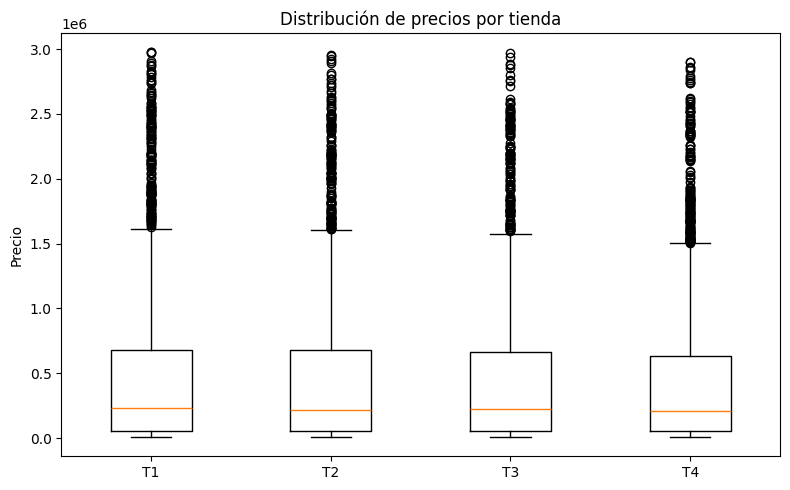

In [64]:
price_col = 'Precio'
data_to_plot = [tienda1[price_col], tienda2[price_col], tienda3[price_col], tienda4[price_col]]
labels = ['T1','T2','T3','T4']
plt.figure(figsize=(8,5))
plt.boxplot(data_to_plot, labels=labels, showfliers=True)
plt.title('Distribución de precios por tienda')
plt.ylabel('Precio')
plt.tight_layout()
plt.savefig('images/boxplot_precios.png')
plt.show()



In [65]:

resumen = ingresos_df.set_index('Tienda')[['Ingreso Total']].copy()
resumen['Calificación Promedio'] = [calif_t1, calif_t2, calif_t3, calif_t4]
resumen['N_reseñas'] = resumen.index.map(n_reseñas)
resumen['Envio Promedio'] = [envio_t1, envio_t2, envio_t3, envio_t4]
import os
os.makedirs('results', exist_ok=True)
pd.options.display.float_format = '{:,.0f}'.format
resumen

resumen.to_csv('results/resumen_tiendas.csv', index=False)
resumen


,Ingreso Total,Calificación Promedio,N_reseñas,Envio Promedio
Tienda,,,,
Tienda 1,"1,150,880,400",4,2359,"26,019"
Tienda 2,"1,116,343,500",4,2359,"25,216"
Tienda 3,"1,098,019,600",4,2359,"24,806"
Tienda 4,"1,038,375,700",4,2358,"23,459"


In [66]:

resumen = ingresos_df.set_index('Tienda')[['Ingreso Total']].copy()
resumen['Calificación Promedio'] = [calif_t1, calif_t2, calif_t3, calif_t4]
resumen['N_reseñas'] = resumen.index.map(n_reseñas)
resumen['Envio Promedio'] = [envio_t1, envio_t2, envio_t3, envio_t4]
import os
os.makedirs('results', exist_ok=True)  # crea la carpeta si no existe
pd.options.display.float_format = '{:,.0f}'.format
resumen

resumen.to_csv('results/resumen_tiendas.csv', index=False)
resumen



,Ingreso Total,Calificación Promedio,N_reseñas,Envio Promedio
Tienda,,,,
Tienda 1,"1,150,880,400",4,2359,"26,019"
Tienda 2,"1,116,343,500",4,2359,"25,216"
Tienda 3,"1,098,019,600",4,2359,"24,806"
Tienda 4,"1,038,375,700",4,2358,"23,459"


In [69]:
import pandas as pd

archivos = {
    1: 'tienda_1.csv',
    2: 'tienda_2.csv',
    3: 'tienda_3.csv',
    4: 'tienda_4.csv'
}

for i in range(1, 5):
    df = pd.read_csv(archivos[i])
    print(f'Tienda {i} columnas:')
    print(df.columns)
    print('-' * 60)




Tienda 1 columnas:
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
------------------------------------------------------------
Tienda 2 columnas:
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
------------------------------------------------------------
Tienda 3 columnas:
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
------------------------------------------------------------
Tienda 4 columnas:
Index(['Producto', 'Categoría del Producto', 'Preci

## Informe y recomendación final

**Introducción**  
El objetivo del análisis fue identificar cuál de las cuatro tiendas de Alura Store es la menos eficiente y por tanto candidata para ser vendida. Se analizaron ingresos, ventas por categoría, calificaciones de clientes, productos con mayor/menor rotación y costo de envío promedio.

**Resumen de métricas clave**
- Ingresos totales:
  - Tienda 1: $1,150,880,000
  - Tienda 2: $1,116,344,000
  - Tienda 3: $1,098,020,000
  - Tienda 4: $1,038,376,000  ← *menor ingreso*
- Calificación promedio:
  - T1: 3.98 | T2: 4.04 | T3: 4.05 | T4: 4.00
- Envío promedio (COP):
  - T1: 26,018.61 | T2: 25,216.24 | T3: 24,805.68 | T4: 23,459.46

**Interpretación integrada**  
Aunque la Tienda 4 no presenta la peor calificación (4.00) ni el mayor costo de envío (es de hecho el más bajo), **es la de menor facturación** entre las cuatro tiendas (~$1,038 millones), lo que indica menor generación de ingresos recurrentes. Las demás tiendas, aunque con pequeñas diferencias en calificación, generan mayores ingresos y tienen perfiles de ventas similares. La Tienda 4 no muestra ventajas claras (por ejemplo, alta calificación, baja concentración de categorías o costes de envío claramente favorables que compensen la baja facturación).

**Recomendación**  
Se recomienda que el Sr. Juan **venda la Tienda 4**. Motivos:
1. **Ingresos más bajos**: es la tienda con menor facturación total, lo que reduce su aporte a la rentabilidad consolidada.  
2. **Satisfacción promedio similar**: su calificación (4.00) no es suficientemente superior para justificar mantener una unidad con ingresos menores.  
3. **Mayor eficiencia del capital**: vender esta unidad liberaría capital que puede reinvertirse en mejorar las tiendas con mayor tracción o iniciar el nuevo emprendimiento con menor riesgo operativo.

**Notas y precauciones**  
- Recomendamos revisar inventario e historial de promociones/marketing de la Tienda 4 antes de la venta — podría haber causas recuperables (campañas inválidas, problemas logísticos temporales).  
- Si la Tienda 4 tuviera clientes recurrentes con alto valor LTV o contratos especiales, considerar esos factores cualitativos antes de la venta definitiva.
